In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

In [2]:
df = pd.read_csv('data/california_house_train.csv') 
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [3]:
# this cell will show the correlations for each column on how closs they are with our tageet column or the household
target_col = 'households'
df_corr = df.corr()[target_col]
df_corr

longitude             0.059628
latitude             -0.074902
housing_median_age   -0.302754
total_rooms           0.919018
total_bedrooms        0.980920
population            0.909247
households            1.000000
median_income         0.007644
median_house_value    0.061031
Name: households, dtype: float64

Text(0, 0.5, 'Households')

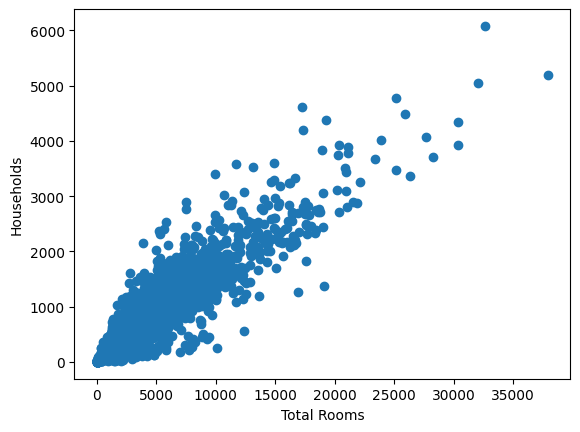

In [4]:
#Visualize the relation between the target and for each of this close to 1.0 correlation results
x_1_temp = df.total_rooms
y_temp = df.households
plt.scatter(x_1_temp, y_temp)
plt.xlabel('Total Rooms')
plt.ylabel('Households')

Text(0, 0.5, 'Households')

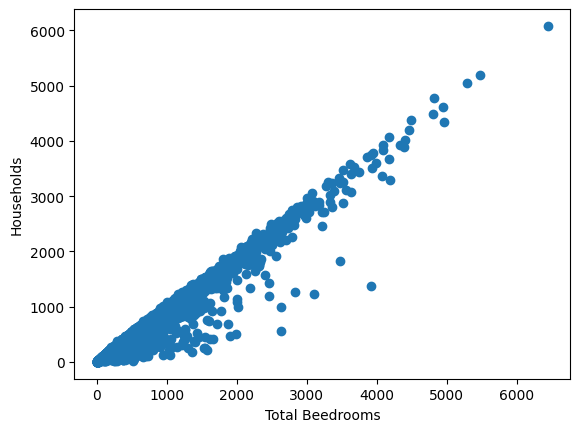

In [5]:
x_2_temp = df.total_bedrooms
plt.scatter(x_2_temp, y_temp)
plt.xlabel('Total Beedrooms')
plt.ylabel('Households')

Text(0, 0.5, 'Households')

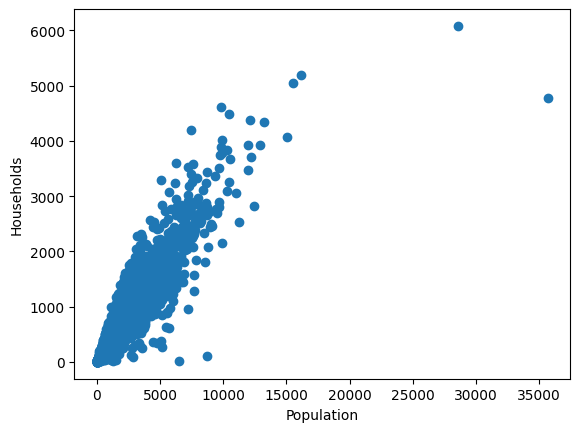

In [6]:
x_3_temp = df.population
plt.scatter(x_3_temp, y_temp)
plt.xlabel('Population')
plt.ylabel('Households')

<h2>We can see in the visualization that this 3 colums are indeed had a correlation in the y target or the 'households' column its very linear</h2>

In [7]:
#Now that we can see that there are 3 values that are very close or correlated to our target column lets store this on the array to plugin as our filter in a new data frame
df_keep = ['total_rooms', 'total_bedrooms', 'population' , 'households'] #the last column is our target to predict
df_train = df.filter(df_keep)#filtering
df_train

,total_rooms,total_bedrooms,population,households
0,5612.0,1283.0,1015.0,472.0
1,7650.0,1901.0,1129.0,463.0
2,720.0,174.0,333.0,117.0
3,1501.0,337.0,515.0,226.0
4,1454.0,326.0,624.0,262.0
...,...,...,...,...
16995,2217.0,394.0,907.0,369.0
16996,2349.0,528.0,1194.0,465.0
16997,2677.0,531.0,1244.0,456.0
16998,2672.0,552.0,1298.0,478.0


In [8]:
#Now that it is formatted the way it should be. To be able to feed the x or input values we need to convert it as numpy
df_numpy = df_train.to_numpy()#conversion to numpy
df_numpy.shape # this should match to our df_train data frame which is indeed  17000 * 4

(17000, 4)

In [9]:
#we can now start to slice our converted numpy data frame to seperate our x inputs and y target
x_train = df_numpy[:, :3] #this line holds the x input columns [total_rooms, total_bedrooms, population]
y_train = df_numpy[:, -1]# this holds the y target or the household column
print(f'x_train shape {x_train.shape} , y_train.shape {y_train.shape}')#To confirm if its sliced correctly

x_train shape (17000, 3) , y_train.shape (17000,)


<h2>This will be the formula for Multi Linear Regression from Scratch</h2>

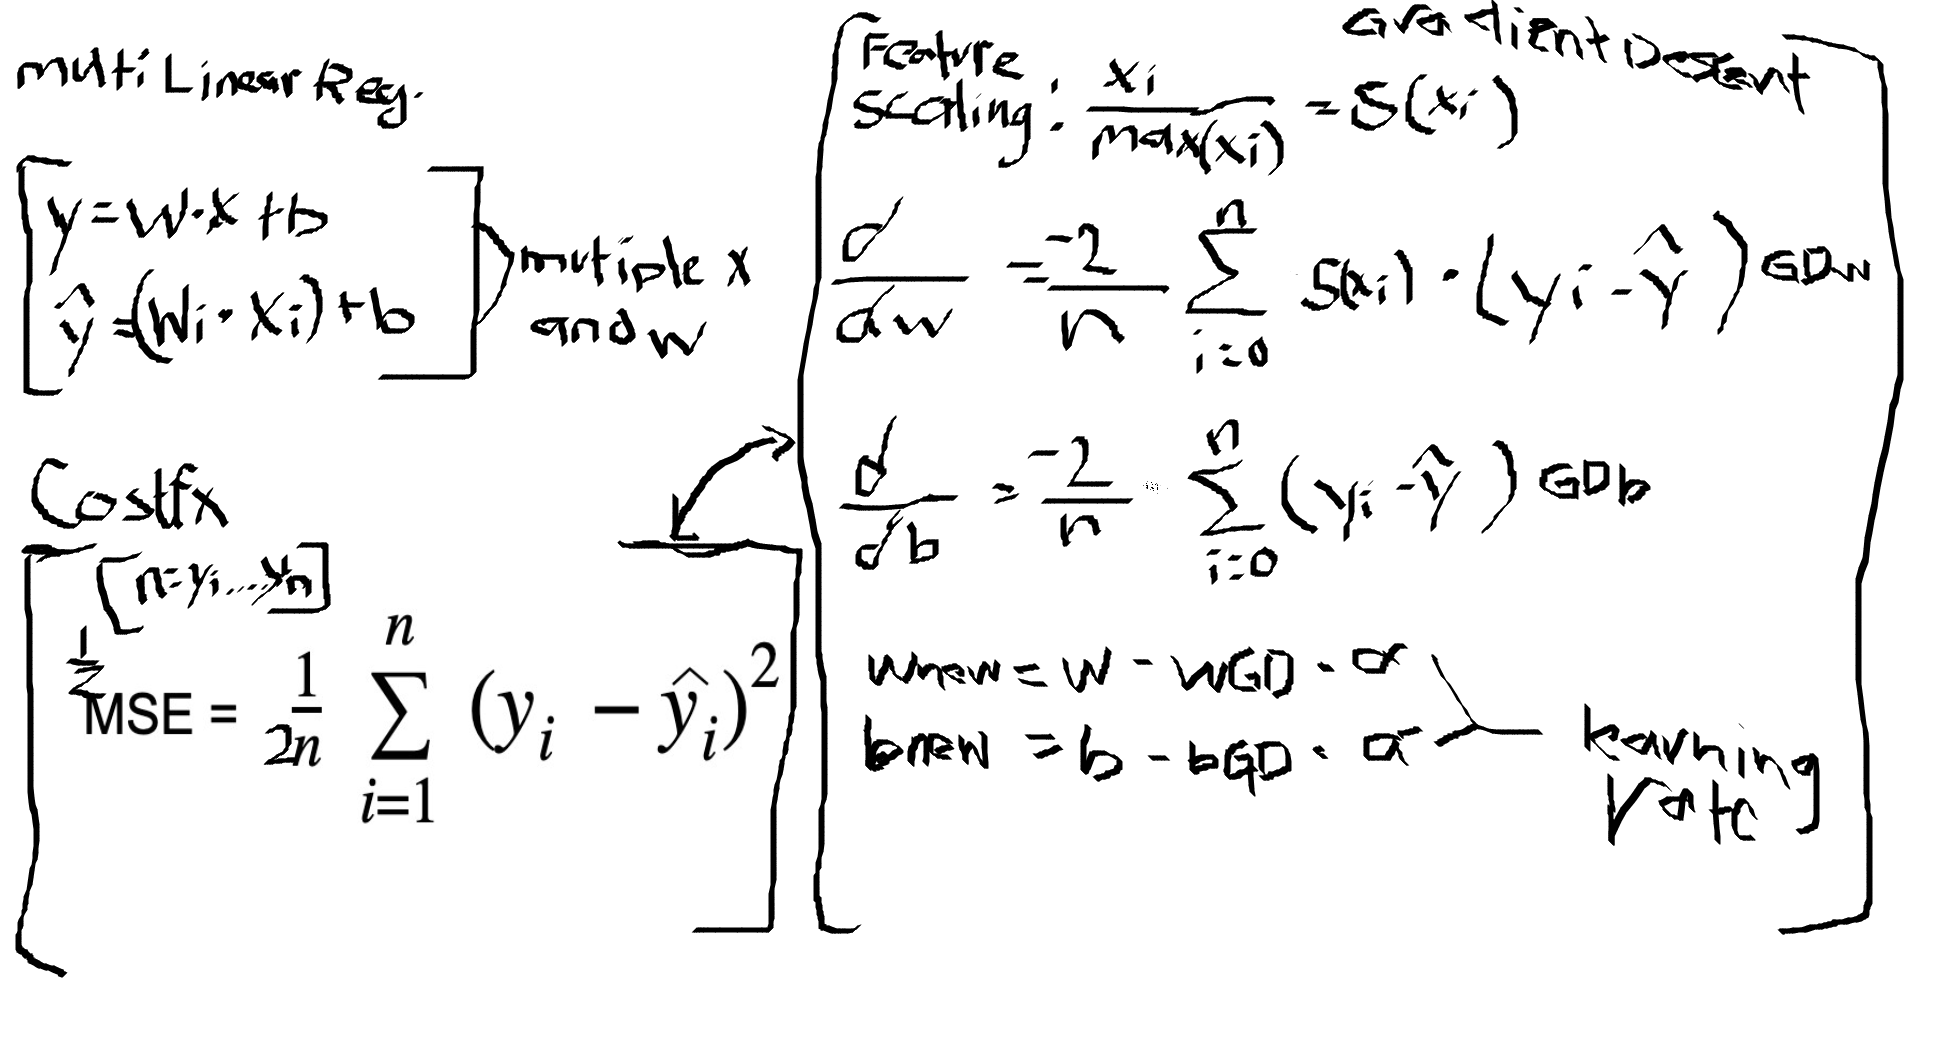

In [10]:
Image('images/multi_linear_reg_formula.png')

In [11]:
#In this cell we can now create and apply the model from scratch base on the formula aboce for the multiple linear regression model
w = np.array([0.1, 0.4, 0.1]) #this will be the weight for the x it should have 3 values the match the column number which is 3
b = -32 #this will be the bias or y intercept

def multi_linear_regression(x, w, b):
    y_hat = x@w + b #thiss will be the matrix multiplication this is the same as np.dot()
    return y_hat

test_pred = multi_linear_regression(x_train,w,b)
print(test_pred)
df_pred = pd.concat([df_train, pd.DataFrame(test_pred, columns=['Predicted_Target'])], axis=1)
df_pred

[1143.9 1606.3  142.9 ...  572.5  585.8  350.6]


,total_rooms,total_bedrooms,population,households,Predicted_Target
0,5612.0,1283.0,1015.0,472.0,1143.9
1,7650.0,1901.0,1129.0,463.0,1606.3
2,720.0,174.0,333.0,117.0,142.9
3,1501.0,337.0,515.0,226.0,304.4
4,1454.0,326.0,624.0,262.0,306.2
...,...,...,...,...,...
16995,2217.0,394.0,907.0,369.0,438.0
16996,2349.0,528.0,1194.0,465.0,533.5
16997,2677.0,531.0,1244.0,456.0,572.5
16998,2672.0,552.0,1298.0,478.0,585.8


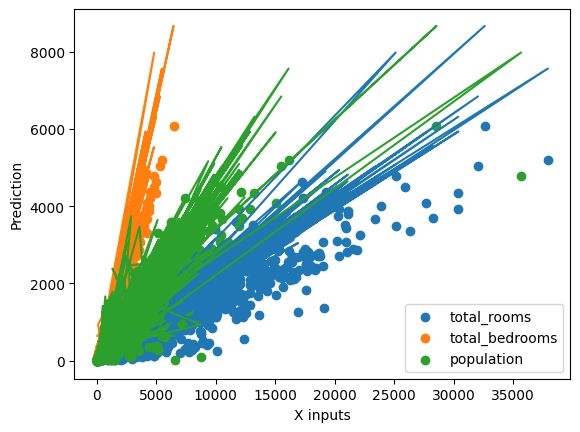

In [12]:
pred_chart = multi_linear_regression(x_train, w, b)

#combine the 3 x columns and the y target together to plot our multi linear regression model
plt.scatter(x_1_temp, y_temp)
plt.scatter(x_2_temp, y_temp)
plt.scatter(x_3_temp, y_temp)
plt.legend(["total_rooms","total_bedrooms", "population"])

#plotting the 3 x cols in multi reg. function with our manual estimation with its multiple weight values and single bias
plt.xlabel('X inputs')
plt.ylabel('Prediction')
plt.plot(x_1_temp, pred_chart)
plt.plot(x_2_temp, pred_chart)
plt.plot(x_3_temp, pred_chart)


<h2>We can see that it is overfitting with our guessed weight values and bias. Now we can cook our cost function to show how much our loss.</h2>

In [13]:
def cost_function(x,y,w,b):  
    n = len(y)
    total_cost = float(0)
    for i in range(n):
        y_hat = np.dot(x, w) + b   
        total_cost += (y[i] - y_hat)**2
    sum_cost = np.sum(total_cost) # we need to use the np.sum() inorder to print the total_cost as float because in this notebook uses Python 3.10.13 and its numpy version it returns a list of all values
    total_cost = sum_cost/(2*n)
    return total_cost
        

3318665551.0645576


Text(0, 0.5, 'Cost')

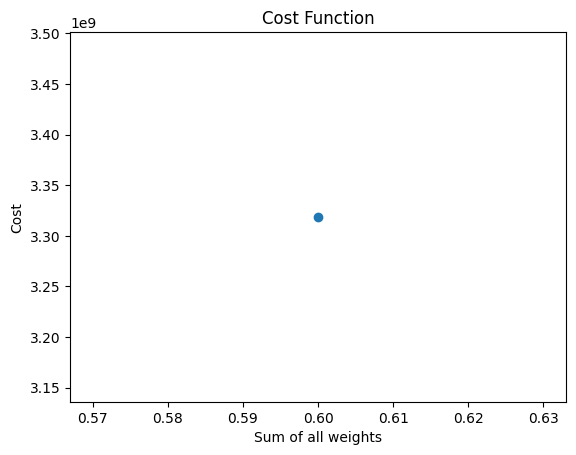

In [14]:
loss = cost_function(x_train,y_train, w, b)
print(loss)
#Now we visualize the how much our loss without guessed weight values
#first we need to sum all our weights which has 3 values
total_w = sum(w)
plt.title('Cost Function')
plt.scatter(total_w, loss)
plt.xlabel('Sum of all weights')
plt.ylabel('Cost')

<h3>Now that we have the cost function result. It's time to code our Gradient descent algorithm to atleast minimize our cost function result and to fit our predictions on the y target('bedrooms')</h3>

<h3>Before we can feed the 3 x columns we must analyze the data value if their row value is bigger than 100 then it should be rescaled otherwise our gradient descent will produce nonsense or overloading the list that can cause an error related in scalar because its a very large number it just can't calculate in that way. What we need to do is Feature Scaling we get the value of our 3 x of colums we name it x_1,x_2,x_3 after that we get the value for each row in that 3 colums and divide it to their max value the formula would be x_n/max value so for the column x_1 it should be x_1/max value for each row in that column and same for x_2 and x_3 you'll get the idea. Now we can do it programatically by using the .max() to get the max value and np.divide() from numpy it works like np.dot() but in division form. Usage below: </h3>

In [15]:
#'total_rooms', 'total_bedrooms', 'population'
    #x_1          x_2               x_3
x_1 = df.total_rooms.max()
x_2 = df.total_bedrooms.max()
x_3 = df.population.max()
print(f'x_1 max value: {x_1}, x_2 max value: {x_2}, x_3 max_value {x_3}')
#now that we have the max values for each columns we can now make those values as a numpy array and uses that scaled version of x_1 to x_3
x_max = np.array([37937.0, 6445.0, 35682.0])

x_1 max value: 37937.0, x_2 max value: 6445.0, x_3 max_value 35682.0


In [16]:
#using the x_scaled to the gradient descent
def gradient_descent(x, w, b, learning_rate):
    
    n = len(y_train)
    w_gradient = 0
    b_gradient = 0
    
    for i in range(n):
        x = x_train[i]
        x_scaled = np.divide(x,x_max)#feature scaling the x_1, to x_3
        y_hat = x_scaled@w + b#feeding the featured x to matrix multiplication for context this @ symbol is equivalent to numpy.dot() I like using it because it look shorter and clean :)
        y = y_train[i]
        w_gradient += -(2/n) * x_scaled * (y - y_hat)
        b_gradient += -(2/n) * (y - y_hat)
        
    new_w = w - w_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    
    return new_w, new_b
#
#this line of code doesnt use x_scaled to test and know what would happen if feature scaling is not implemented.
# def gradient_descent(x, w, b, learning_rate):
    
#     n = len(y_train)
#     w_gradient = 0
#     b_gradient = 0
    
#     for i in range(n):
#         x = x_train[i]
#         y_hat = x@w + b
#         y = y_train[i]
        
#         w_gradient += -(2/n) * x * (y - y_hat)
#         b_gradient += -(2/n) * (y - y_hat)
        
#     new_w = w - w_gradient * learning_rate
#     new_b = b - b_gradient * learning_rate
    
#     return new_w, new_b

In [17]:
epoch = 10 #num of times how the weights and bias being iterated in gradient descent 
w = np.array([0.1, 0.1, 0.06]) # assigning some reasonable value to make the gradient descent faster and more consistent or try generating random integers for more choices.
b = -142 #same as weights assigning some reasonable value or randomize it.
lr = 0.000001 #the learning rate

for i in range(epoch):
    #print('|', end = '')
    print(f'epoch of {i}: {epoch}')
    w,b = gradient_descent(x_train, w, b, lr)
print(f'weight {w}, bias {b}')

epoch of 0: 10
epoch of 1: 10
epoch of 2: 10
epoch of 3: 10
epoch of 4: 10
epoch of 5: 10
epoch of 6: 10
epoch of 7: 10
epoch of 8: 10
epoch of 9: 10
weight [0.10130252 0.10156995 0.06074031], bias -141.9871360340564


<h3>In this section we plug in the weights and bias in the multi linear regression and cost function and visualize the result, Basically same implementation from above example on our guessed value just different input generated from gradient descent</h3>

In [18]:
#visualize and test weights and bias from gradient descent
gradient_test_pred = multi_linear_regression(x_train,w,b)
print(gradient_test_pred)
df_pred = pd.concat([df_train, pd.DataFrame(gradient_test_pred, columns=['Predicted_Target'])], axis=1)
df_pred

[618.48824203 894.63739427 -31.14963125 ... 258.6942838  263.60071662
 121.8111151 ]


,total_rooms,total_bedrooms,population,households,Predicted_Target
0,5612.0,1283.0,1015.0,472.0,618.488242
1,7650.0,1901.0,1129.0,463.0,894.637394
2,720.0,174.0,333.0,117.0,-31.149631
3,1501.0,337.0,515.0,226.0,75.578272
4,1454.0,326.0,624.0,262.0,76.320477
...,...,...,...,...,...
16995,2217.0,394.0,907.0,369.0,177.710560
16996,2349.0,528.0,1194.0,465.0,222.125333
16997,2677.0,531.0,1244.0,456.0,258.694284
16998,2672.0,552.0,1298.0,478.0,263.600717


<h3>That is now the prediction value from gradient descent not the best result but still capable of getting a good result by adjusting the inputs.</h3>

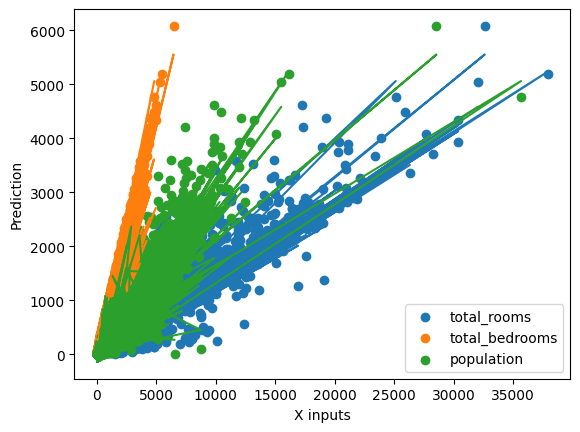

In [19]:
#visualizing the weights and bias using scatterplot
gradient_pred_test = multi_linear_regression(x_train, w, b)
#combine the 3 x columns and the y target together to plot our multi linear regression model
plt.scatter(x_1_temp, y_temp)
plt.scatter(x_2_temp, y_temp)
plt.scatter(x_3_temp, y_temp)
plt.legend(["total_rooms","total_bedrooms", "population"])

#plotting the 3 x cols in multi reg. function with our manual estimation with its multiple weight values and single bias
plt.xlabel('X inputs')
plt.ylabel('Prediction')
plt.plot(x_1_temp, gradient_pred_test)
plt.plot(x_2_temp, gradient_pred_test)
plt.plot(x_3_temp, gradient_pred_test)

<h3>Nice and it looks better with some overfitting(we can still atleast minimize the overfitting by adjusting the inputs and rerun gradient descent but for this demonstration its all about how this functions and algorithm works). Besides it is much better than before our first test with guessed/estimated weights and bias. Now is the time to look at the cost function how much we decrease the loss.</h3>

3318665551.0645576


Text(0, 0.5, 'Cost')

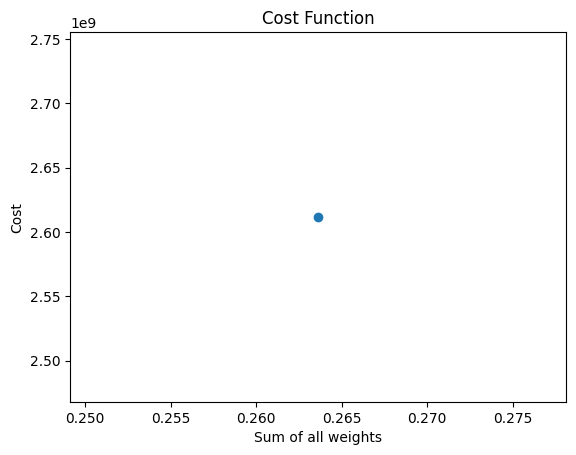

In [20]:
#Seeing the cost function decrease with new weights and bias from gradient descent
gradient_loss = cost_function(x_train,y_train, w, b)
print(loss)
#Now we visualize the how much our loss without guessed weight values
#first we need to sum all our weights which has 3 values
total_w = sum(w)
plt.title('Cost Function')
plt.scatter(total_w, gradient_loss)
plt.xlabel('Sum of all weights')
plt.ylabel('Cost')

<h3>Nice the cost function is decreased as expected!.</h3>

<h1>Done,Thank you for reading!</h1>